# 네이버 웹툰 웹스크랩핑

웹사이트 주소: https://comic.naver.com/index

원하는 데이터: 현재 가장 핫한 액션 웹툰 Top10

1. 필요한 라이브러리 불러오기

In [1]:
import requests
from bs4 import BeautifulSoup

2. 웹페이지 요청 및 원하는 데이터 요소 파싱하기

In [2]:
url = 'https://comic.naver.com/index'
webtoon = requests.get(url)
print(webtoon) # 200: 응답요청 성공

<Response [200]>


In [3]:
soup = BeautifulSoup(webtoon.text, 'html.parser')
print(soup)


<!DOCTYPE html>

<html lang="ko">
<head>
<title>네이버 웹툰</title>
<link href="https://shared-comic.pstatic.net/favicon/favicon_96x96.ico" rel="icon" type="image/x-icon"/>
<link href="https://ssl.pstatic.net/static/wcc/kw-owner/prod-1.0/index.css" rel="stylesheet" type="text/css">
<link href="https://m.comic.naver.com/index" rel="canonical"/>
<meta content="6Wv2YrpTSpapViVikuUS-ebAqZDiKxcrDV_clkRzH9A" name="google-site-verification"/>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="article" property="og:type"/>
<meta content="네이버 웹툰" property="og:article:author"/>
<meta content="https://comic.naver.com" property="og:article:author:url"/>
<meta content="" property="og:title"/>
<meta content="https://ssl.pstatic.net/static/comic/images/og_tag_v3.png" property="og:image"/>
<meta content="매일매일 새로운 재미, 네이버 웹툰." property="og:description"/>
<script>
		if (/MSIE \d|Trident.*rv:/.test(navigator.userAgent)) {
			window.location = 'microsoft-edge:' + win

제목 seletor

#content > div:nth-child(2) > div.FlickingList__flicking_wrap--vnPay > div.flicking-viewport > div > ol > li:nth-child(1) > div > a > span > span

In [4]:
soup.select("ol.FlickingList__content_list--vG5lo")

[]

현재 request에 의한 요청은 사이트에서 '봇'으로 인식해서 막아논 듯 하다.

그래서 다른 방법인 Selenium을 선택

1. 필요한 라이브러리 불러오기

In [5]:
from selenium.webdriver import Chrome
import os
from selenium.webdriver.chrome.options import Options

2.  웹사이트 연결하기

In [6]:
#Chrome 브라우저의 실행 옵션을 설정하기 위해 Options 객체를 만들기
chrome_options = Options()

#브라우저 창을 자동화가 끝나도 닫지 않고, 계속 열어두게 함
chrome_options.add_experimental_option(name='detach', value=True)
chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36")

#Chrome 브라우저를 위에서 설정한 옵션과 함께 실행
driver = Chrome(options=chrome_options)
driver.get(url) 

3. 요소 찾기

In [20]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# 액션 웹툰 10위
title_elements = driver.find_elements(By.CSS_SELECTOR, "span.ContentTitle__title--e3qXt")

title = []
for elem in title_elements[:5]:
    title.append(elem.text)
print(title)

['시든 꽃에 눈물을', '왕과의 야행', '썰:관계주의', '이섭의 연애', '재혼 황후']


In [ ]:
import os
import re
import requests

#  이미지 요소 가져오기
image_elements = driver.find_elements(
    By.CSS_SELECTOR,
    "ol.FlickingList__content_list--vG5lo div.Poster__thumbnail_area--gviWY > img"
)

# 이미지 폴더만들기
folder = "webtoon_images"
os.makedirs(folder, exist_ok=True)

# 이미지 폴더 저장 및 폴더 이름 생성하기
for idx, img in enumerate(image_elements, 1):
    img_url = img.get_attribute("src")
    raw_title = title[idx - 1]

    # 정규식으로 금지문자 제거
    safe_title = re.sub(r'[\\/:*?"<>|]', '', raw_title)

    file_path = os.path.join(folder, safe_title + '.jpg')

    if img_url:
        try:
            headers = {"User-Agent": "Mozilla/5.0"}
            response = requests.get(img_url, headers=headers)
            response.raise_for_status()

            with open(file_path, "wb") as f:
                f.write(response.content)

            print(f"✅ Saved: {file_path}")

        except Exception as e:
            print(f"❌ Error at {idx}: {e}")


✅ Saved: webtoon_images\시든 꽃에 눈물을.jpg
✅ Saved: webtoon_images\왕과의 야행.jpg
✅ Saved: webtoon_images\썰관계주의.jpg
✅ Saved: webtoon_images\이섭의 연애.jpg
✅ Saved: webtoon_images\재혼 황후.jpg


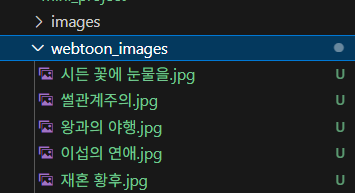

확인 완료